### Student Information
Name:余仲哲

Student ID:105071502

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

In [375]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print (__version__) # requires version >= 1.9.0
import plotly.graph_objs as go
init_notebook_mode(connected=True)
# iplot([go.Scatter(x=[1, 2, 3], y=[3, 1, 6])])

2.2.3


In [4]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

In [377]:
categories = ['sentence','score']

In [378]:
list_ = []
fileName = ['amazon_cells_labelled','imdb_labelled','yelp_labelled']
path = "./sentiment labelled sentences/";
frame = pd.DataFrame()
#read file into one dataframe
for n in fileName:
    df = pd.read_csv(path+n+".txt",sep="\\\t",names=categories,engine="python")
    list_.append(df)


### Exercise 0: 
Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information.

In [379]:
#concatenate them and reassign the indexes
frame = pd.concat(list_).reset_index(drop=True)
len(frame)

3000

In [380]:
len(list_)

3

In [381]:
len(frame)

3000

In [382]:
print(frame[::500])

                                               sentence  score
0     So there is no way for me to plug it in here i...      0
500   The bose noise cancelling is amazing, which is...      1
1000  A very, very, very slow-moving, aimless movie ...      0
1500  The entire audience applauded at the conclusio...      1
2000                           Wow... Loved this place.      1
2500  I also had to taste my Mom's multi-grain pumpk...      1


In [383]:
#generate a record with missing value and append it
dummy_series = pd.Series([None,None], index=["sentence", "score"])

In [384]:
dummy_series

sentence    None
score       None
dtype: object

In [385]:
result_with_series = frame.append(dummy_series, ignore_index=True)

In [386]:
len(result_with_series)

3001

In [387]:
#cal how many missing value in each column
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 1)
score       (The amoung of missing records is: , 1)
dtype: object

### Exercise 1: 
Code for how to calculate the missing values for every record instead of every column. Hint axis parameter. Check the documentation for more information.

In [388]:
#according to the dmh file, programmer can transpose the dataframe before calculate the amounts of missing value
#then i would get how many missing value in each record
result_with_series.transpose().isnull().apply(lambda x: dmh.check_missing_values(x))

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

Actually I don't know the question is asking how many missing value in a record 
or show that each record is cotainning any missing value
so i completed it in both ways.

In [389]:
result_with_series.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
3000     True
Length: 3001, dtype: bool

Number of record containning missing value

In [390]:
result_with_series.shape[0] - result_with_series.dropna().shape[0]

1

In [391]:
result_with_series.dropna(inplace=True)

In [392]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [393]:
#after dropna, result_with_series deleted the last record, and length became 3000 again
len(result_with_series)

3000

In [394]:
frame.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [395]:
sum(frame.duplicated())

17

In [396]:
X = frame

In [397]:
sum(X.duplicated())

17

In [398]:
#keep the first recode if there is a duplicate one
X.drop_duplicates(keep='first', inplace=True)

In [399]:
len(frame)

2983

In [400]:
len(X)

2983

In [401]:
X_sample = X.sample(n=1000)

In [402]:
len(X_sample)

1000

In [403]:
categories

['sentence', 'score']

In [404]:
X_category_counts = ta.get_tokens_and_frequency(X.score)
X_sample_category_counts = ta.get_tokens_and_frequency(X_sample.score)

In [405]:
py.iplot(ta.plot_word_frequency(X_category_counts, "Category distribution"))

In [406]:
py.iplot(ta.plot_word_frequency(X_sample_category_counts, "Category distribution"))

### Exercise 2: 
We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the Plotly documents for tons of examples and ways to visualizing groups bar charts.

In [407]:
trace1 = go.Bar(
    x=list(X_category_counts[0]),
    y=list(X_category_counts[1]),
    name='X'
)
trace2 = go.Bar(
    x=list(X_sample_category_counts[0]),
    y=list(X_sample_category_counts[1]),
    name='X_sample'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

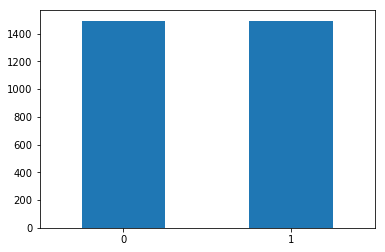

In [408]:
X.score.value_counts().plot(kind="bar", rot=0)

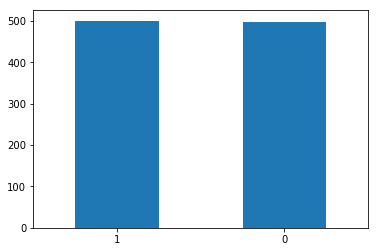

In [409]:
X_sample.score.value_counts().plot(kind="bar", rot=0)

In [410]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [411]:
#tokenize the sentence
X['unigrams'][0:10]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
5    [I, have, to, jiggle, the, plug, to, get, it, ...
6    [If, you, have, several, dozen, or, several, h...
7    [If, you, are, Razr, owner, ..., you, must, ha...
8      [Needless, to, say, ,, I, wasted, my, money, .]
9         [What, a, waste, of, money, and, time, !, .]
Name: unigrams, dtype: object

In [412]:
list(X[0:2]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.'],
 ['Good', 'case', ',', 'Excellent', 'value', '.']]

In [413]:
X[0:2]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
Name: unigrams, dtype: object

In [414]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)

In [415]:
X_counts.shape

(2983, 5155)

In [416]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [417]:
X[0:5]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [418]:
X_counts

<2983x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31515 stored elements in Compressed Sparse Row format>

In [419]:
X_counts[0:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [420]:
count_vect.transform(['Something completely new.'])

<1x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [421]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [448]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [449]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [450]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [451]:
plot_z = X_counts[0:20, 0:20].toarray()

In [426]:
# to plot
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

### Exercise 3: 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

In [427]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[::100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[::100]]
plot_z = X_counts[::100,::100].toarray()
py.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

### 5.4 Dimensionality Reduction

In [428]:
from sklearn.decomposition import PCA

In [429]:
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())

In [430]:
X_reduced.shape

(2983, 3)

In [431]:
categories

['sentence', 'score']

In [432]:
trace1 = ta.get_trace(X_reduced, X["score"], 0, "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, X["score"], 1, "rgb(52,133,252)")

In [433]:
data = [trace1, trace2]

In [434]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

### 5.5 Atrribute Transformation / Aggregation

In [435]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [436]:
term_frequencies[0:5]

[array([1], dtype=int64),
 array([36], dtype=int64),
 array([3], dtype=int64),
 array([2], dtype=int64),
 array([4], dtype=int64)]

In [437]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

### Exercise 4:
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. You can try to reduce the number of terms you want to visualize as an exercise.

In [438]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names()[::10], term_frequencies[::10]], "Term Frequency Distribution"))

### Exercise 5:
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order.

In [439]:
tmpmpList= count_vect.get_feature_names()
tmpFreq = term_frequencies
#sort by frequency
for i in range(1,200):
    for j in range(len(term_frequencies)-1,0,-1):
        if tmpFreq[j][0] > tmpFreq[j-1][0]:
            tmpFreq[j][0], tmpFreq[j-1][0] = tmpFreq[j-1][0], tmpFreq[j][0]
            tmpList[j], tmpList[j-1] = tmpList[j-1], tmpList[j]
#draw
py.iplot(ta.plot_word_frequency([tmpList[0:20], tmpFreq[0:20]], "Term Frequency Distribution"))    

In [453]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [454]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

In [456]:
py.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

In [442]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [443]:
mlb = preprocessing.LabelBinarizer()

In [444]:
mlb.fit(X.score)
X.score[0:5]

0    0
1    1
2    1
3    0
4    1
Name: score, dtype: int64

In [445]:
mlb.classes_

array([0, 1], dtype=int64)

In [446]:
X['bin_category'] = mlb.transform(X.score).tolist()

In [447]:
X[0:9]

,sentence,score,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
